In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data exploration

In [2]:
fd_003_train = pd.read_csv('train_FD003.txt', sep=" ", header=None)

In [3]:
fd_003_test = pd.read_csv('test_FD003.txt', sep=" ", header=None)

In [4]:
fd_003_train.describe

<bound method NDFrame.describe of         0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0005  0.0004  100.0  518.67  642.36  1583.23  1396.84   
1        1    2  0.0008 -0.0003  100.0  518.67  642.50  1584.69  1396.89   
2        1    3 -0.0014 -0.0002  100.0  518.67  642.18  1582.35  1405.61   
3        1    4 -0.0020  0.0001  100.0  518.67  642.92  1585.61  1392.27   
4        1    5  0.0016  0.0000  100.0  518.67  641.68  1588.63  1397.65   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
24715  100  148 -0.0016 -0.0003  100.0  518.67  643.78  1596.01  1424.11   
24716  100  149  0.0034 -0.0003  100.0  518.67  643.29  1596.38  1429.14   
24717  100  150 -0.0016  0.0004  100.0  518.67  643.84  1604.53  1431.41   
24718  100  151 -0.0023  0.0004  100.0  518.67  643.94  1597.56  1426.57   
24719  100  152  0.0000  0.0003  100.0  518.67  643.64  1599.04  1436.06   

          9   ...       18      19    20   21    22  

Two last columns are empty, they will be dropped

In [5]:
fd_003_train.drop(columns = [26,27], inplace = True)

Let's name columns to understand the meaning of the data given

In [6]:
names_col=['unit_number', 'time_cycles', 'setting_1', 'setting_2','setting_3']
for i in range (len(fd_003_train.columns)-5):
  names_col.append('s_' + str(i+1))

fd_003_train.columns = names_col

In [7]:
print('Data shape',fd_003_train.shape)

Data shape (24720, 26)


Data cleaning

In [8]:
fd_003_train.groupby('setting_3').count()

unit_number  time_cycles  setting_1  setting_2    s_1    s_2  \
setting_3                                                                 
100.0            24720        24720      24720      24720  24720  24720   

             s_3    s_4    s_5    s_6  ...   s_12   s_13   s_14   s_15   s_16  \
setting_3                              ...                                      
100.0      24720  24720  24720  24720  ...  24720  24720  24720  24720  24720   

            s_17   s_18   s_19   s_20   s_21  
setting_3                                     
100.0      24720  24720  24720  24720  24720  

[1 rows x 25 columns]

In [9]:
fd_003_train.drop(columns = 'setting_3', inplace = True)

Setting_3 has the same number for every row, it will not give meaningful infromation, we'll drop this column

In [10]:
fd_003_train.isna().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

We don't have meamimgless data now, let's go further

In [11]:
fd_003_train.loc[:,['unit_number','time_cycles']].describe()

unit_number   time_cycles
count  24720.000000  24720.000000
mean      48.631877    139.077063
std       29.348985     98.846675
min        1.000000      1.000000
25%       23.000000     62.000000
50%       47.000000    124.000000
75%       74.000000    191.000000
max      100.000000    525.000000

In [12]:
fd_003_train.loc[:,'s_1':].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   24720.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
s_2   24720.0   642.457858  5.230311e-01   640.8400   642.0800   642.4000   
s_3   24720.0  1588.079175  6.810418e+00  1564.3000  1583.2800  1587.5200   
s_4   24720.0  1404.471212  9.773178e+00  1377.0600  1397.1875  1402.9100   
s_5   24720.0    14.620000  3.552786e-15    14.6200    14.6200    14.6200   
s_6   24720.0    21.595841  1.811600e-02    21.4500    21.5800    21.6000   
s_7   24720.0   555.143808  3.437343e+00   549.6100   553.1100   554.0500   
s_8   24720.0  2388.071555  1.582849e-01  2386.9000  2388.0000  2388.0700   
s_9   24720.0  9064.110809  1.998029e+01  9017.9800  9051.9200  9060.0100   
s_10  24720.0     1.301232  3.484849e-03     1.2900     1.3000     1.3000   
s_11  24720.0    47.415707  3.000742e-01    46.6900    47.1900    47.3600   
s_12  24720.0   523.050873  3.255314e+00   517.7700   521.1500   521.9800   
s_13  24720.0  2388.071643  1.581207e-01  2386.9300  2388.0100  2388.0700   
s_14  24720.0  8144.202916  1.650412e+01  8099.6800  8134.5100  8141.2000   
s_15  24720.0     8.396176  6.051161e-02     8.1563     8.3606     8.3983   
s_16  24720.0     0.030000  1.734759e-17     0.0300     0.0300     0.0300   
s_17  24720.0   392.566545  1.761459e+00   388.0000   391.0000   392.0000   
s_18  24720.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  24720.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  24720.0    38.988552  2.488647e-01    38.1700    38.8300    38.9900   
s_21  24720.0    23.393024  1.492338e-01    22.8726    23.2962    23.3916   

            75%        max  
s_1    518.6700   518.6700  
s_2    642.7900   645.1100  
s_3   1592.4125  1615.3900  
s_4   1410.6000  1441.1600  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    556.0400   570.4900  
s_8   2388.1400  2388.6000  
s_9   9070.0925  9234.3500  
s_10     1.3000     1.3200  
s_11    47.6000    48.4400  
s_12   523.8400   537.4000  
s_13  2388.1400  2388.6100  
s_14  8149.2300  8290.5500  
s_15     8.4370     8.5705  
s_16     0.0300     0.0300  
s_17   394.0000   399.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    39.1400    39.8500  
s_21    23.4833    23.9505

As we can see s_1, s_5, s_16, s_18 and s_19 have the same values during all cycles of exploatation, so we will no have meaningfull info here too, let's drop it

In [13]:
fd_003_train.drop(columns = ['s_1','s_5','s_16','s_18','s_19'], inplace = True)

In [14]:
fd_003_train.to_csv(r'clean_data.csv', index = False, header = True)

# Data visualization

In [15]:
fd_003_train

unit_number  time_cycles  setting_1  setting_2     s_2      s_3  \
0                1            1    -0.0005     0.0004  642.36  1583.23   
1                1            2     0.0008    -0.0003  642.50  1584.69   
2                1            3    -0.0014    -0.0002  642.18  1582.35   
3                1            4    -0.0020     0.0001  642.92  1585.61   
4                1            5     0.0016     0.0000  641.68  1588.63   
...            ...          ...        ...        ...     ...      ...   
24715          100          148    -0.0016    -0.0003  643.78  1596.01   
24716          100          149     0.0034    -0.0003  643.29  1596.38   
24717          100          150    -0.0016     0.0004  643.84  1604.53   
24718          100          151    -0.0023     0.0004  643.94  1597.56   
24719          100          152     0.0000     0.0003  643.64  1599.04   

           s_4    s_6     s_7      s_8      s_9  s_10   s_11    s_12     s_13  \
0      1396.84  21.61  553.97  2387.96  9062.17   1.3  47.30  522.31  2388.01   
1      1396.89  21.61  554.55  2388.00  9061.78   1.3  47.23  522.42  2388.03   
2      1405.61  21.61  554.43  2388.03  9070.23   1.3  47.22  522.03  2388.00   
3      1392.27  21.61  555.21  2388.00  9064.57   1.3  47.24  522.49  2388.08   
4      1397.65  21.61  554.74  2388.04  9076.14   1.3  47.15  522.58  2388.03   
...        ...    ...     ...      ...      ...   ...    ...     ...      ...   
24715  1424.11  21.61  551.86  2388.25  9070.82   1.3  48.27  519.66  2388.30   
24716  1429.14  21.61  551.86  2388.23  9064.60   1.3  48.13  519.91  2388.28   
24717  1431.41  21.61  551.30  2388.25  9063.45   1.3  48.18  519.44  2388.24   
24718  1426.57  21.61  550.69  2388.26  9062.22   1.3  48.05  520.01  2388.26   
24719  1436.06  21.61  550.96  2388.26  9066.52   1.3  48.12  519.48  2388.24   

          s_14    s_15  s_17   s_20     s_21  
0      8145.32  8.4246   391  39.11  23.3537  
1      8152.85  8.4403   392  38.99  23.4491  
2      8150.17  8.3901   391  38.85  23.3669  
3      8146.56  8.3878   392  38.96  23.2951  
4      8147.80  8.3869   392  39.14  23.4583  
...        ...     ...   ...    ...      ...  
24715  8138.08  8.5036   394  38.44  22.9631  
24716  8144.36  8.5174   395  38.50  22.9746  
24717  8135.95  8.5223   396  38.39  23.0682  
24718  8141.24  8.5148   395  38.31  23.0753  
24719  8136.98  8.5150   396  38.56  23.0847  

[24720 rows x 20 columns]

In [16]:
fd_003_cycles = fd_003_train[["unit_number","time_cycles"]]

In [17]:
fd_003_cycles

unit_number  time_cycles
0                1            1
1                1            2
2                1            3
3                1            4
4                1            5
...            ...          ...
24715          100          148
24716          100          149
24717          100          150
24718          100          151
24719          100          152

[24720 rows x 2 columns]

In [18]:
max_cycles = fd_003_cycles.groupby('unit_number').max()

In [19]:
max_cycles['unit_number'] = max_cycles.index

In [20]:
max_cycles

time_cycles  unit_number
unit_number                          
1                    259            1
2                    253            2
3                    222            3
4                    272            4
5                    213            5
...                  ...          ...
96                   491           96
97                   275           97
98                   307           98
99                   145           99
100                  152          100

[100 rows x 2 columns]

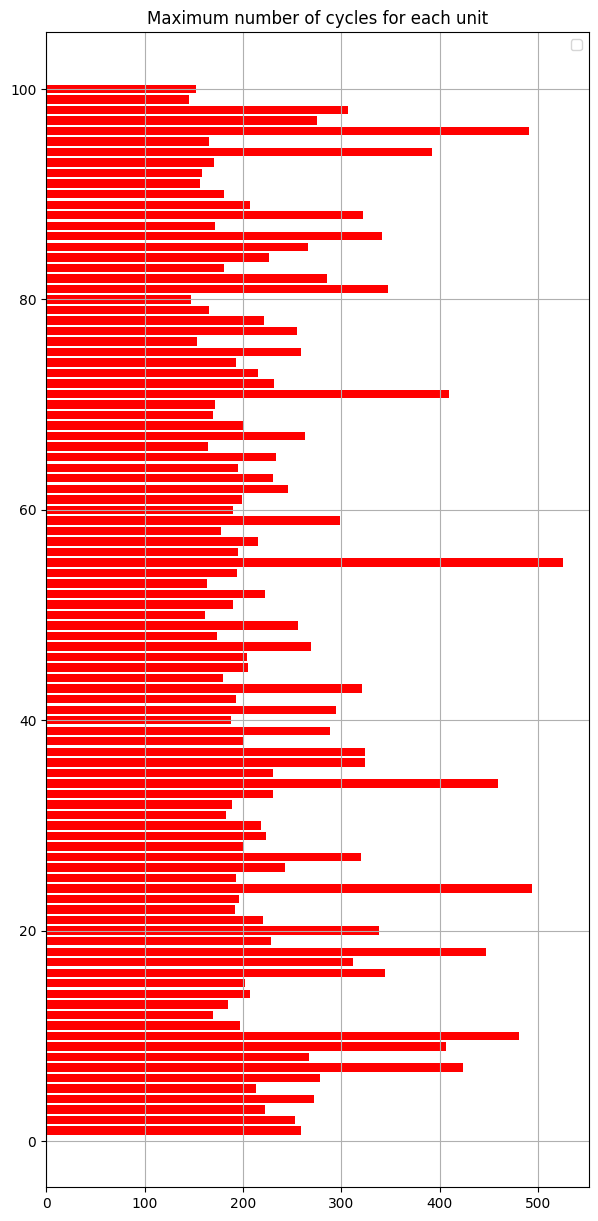

In [21]:
plt.figure(figsize=(7, 15))
plt.title("Maximum number of cycles for each unit")
plt.barh(max_cycles['unit_number'], width = max_cycles['time_cycles'], color='r', )
#plt.plot(max_cycles['time_cycles'], max_cycles['unit_number'], color='r')
plt.legend()
plt.grid(True);

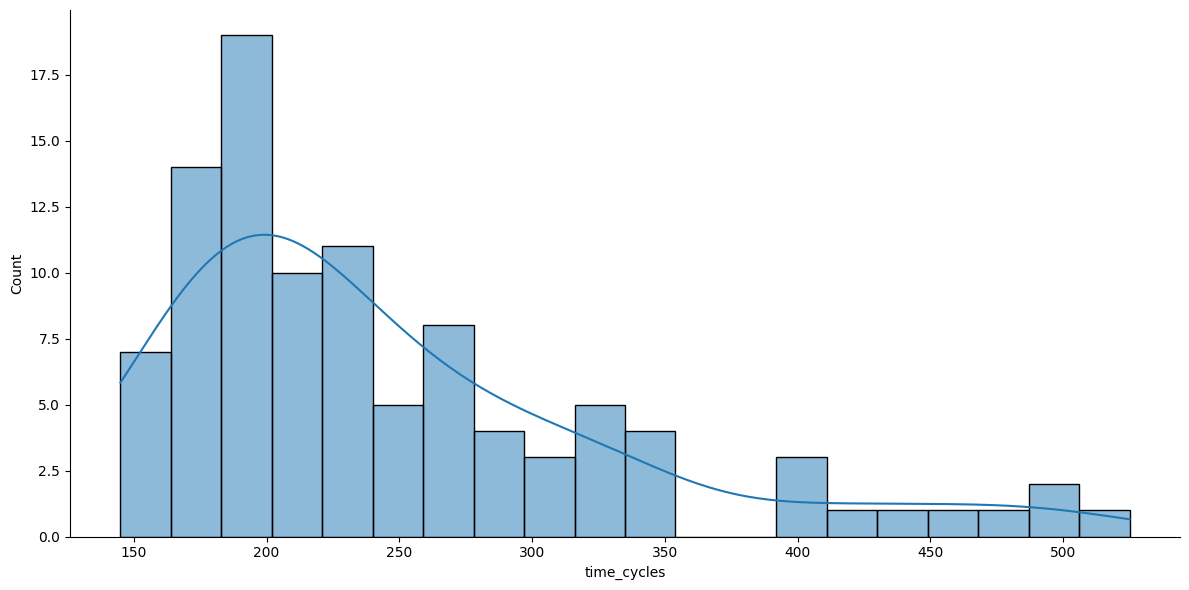

In [23]:
sns.displot(max_cycles['time_cycles'], kde = True, bins = 20, height = 6, aspect = 2)